<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Dog-Breed-Classification-Deep-Learning/blob/master/Dog_Breed_Classification_Data_Preparation_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds


In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

It is a multi-class image classification problem. It's multi-class because we're trying to classify mutliple different breeds of dog.

We're going to follow the following TensorFlow/Deep Learning workflow:
1. Get data ready 
    * Download from Kaggle 
    * Upload to Google Drive
    * Unzip
    * Import
2. Prepare the data 
    * preprocessing
    * Preparing train, validation and test set
3. Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).
4. Evaluating a model 
    * making predictions
    * comparing them with the ground truth labels
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model (once satisfactory results obtained).

**For preprocessing our data:** 
We're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

**For our machine learning model:** 
We're going to be using a pretrained deep learning model from TensorFlow Hub. 

The process of using a pretrained model and adapting it to your own problem is called **transfer learning**. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.



## Getting our workspace ready


### Import tensorflow 2.x and tensorflow_hub

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
print(tf.__version__)
print(hub.__version__)
print("GPU Available!" if tf.config.list_physical_devices("GPU") else "Not Available.")

2.2.0
0.8.0
GPU Available!


In [5]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### To use GPU 
> goto Runtime->Change Runtime Type and select GPU  
**Remember this will reset your kernel/Runtime so you will need to reinstantiate everything**

#### Let us check how fast GPU actually is!!

In [6]:
# # some code to test speed of GPU vs CPU [taken from colab]
# import tensorflow as tf
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

# def cpu():
#   with tf.device('/cpu:0'):
#     random_image_cpu = tf.random.normal((100, 100, 100, 3))
#     net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#     return tf.math.reduce_sum(net_cpu)

# def gpu():
#   with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)
  
# # We run each op once to warm up; see: https://stackoverflow.com/a/45067900
# cpu()
# gpu()

# # Run the op several times.
# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

## Getting data ready

There are a few ways we could do this. Many of them are detailed in the [Google Colab notebook on I/O (input and output)](https://colab.research.google.com/notebooks/io.ipynb).

Because the data we're using is hosted on Kaggle, we could even use the [Kaggle API](https://www.kaggle.com/docs/api).


We can also upload to Google Drive, mount the drive to this notebook and import the file.

### Mount the Google Drive

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')


Following the prompts from the cell above, if everything worked, we should see a "drive" folder available under the Files tab.

This means we'll be able to access files in our Google Drive right in this notebook.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data) and uploaded it to my Google Drive as a .zip file under the folder "Data".

To access it, we'll have to unzip it.

**Note:** Running the cell below for the first time could take a while (a couple of minutes is normal). After you've run it once and got the data in your Google Drive, you don't need to run it again.



### Unzip data folder in drive

In [8]:
# Use the '-d' parameter as the destination for where the files should go
#!unzip "drive/My Drive/Dog-Breed-Classification-Deep-Learning/dog-breed-identification.zip" -d "drive/My Drive/Dog-Breed-Classification-Deep-Learning/"

Once the files have been unzipped to your Google Drive, you don't have to run the cell above anymore.


### Accessing the data

Now the data files we're working with are available on our Google Drive, we can start to check it out.

Let's start with `labels.csv` which contains all of the image ID's and their assosciated dog breed (our data and labels).

In [9]:
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog-Breed-Classification-Deep-Learning/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     79010e9eef804bc1fca107849c04b280  scottish_deerhound
freq                                   1                 126

In [11]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


Let us visualize how many images we have of each class by making a bar plot.

In [12]:
labels_csv.dtypes

id       object
breed    object
dtype: object

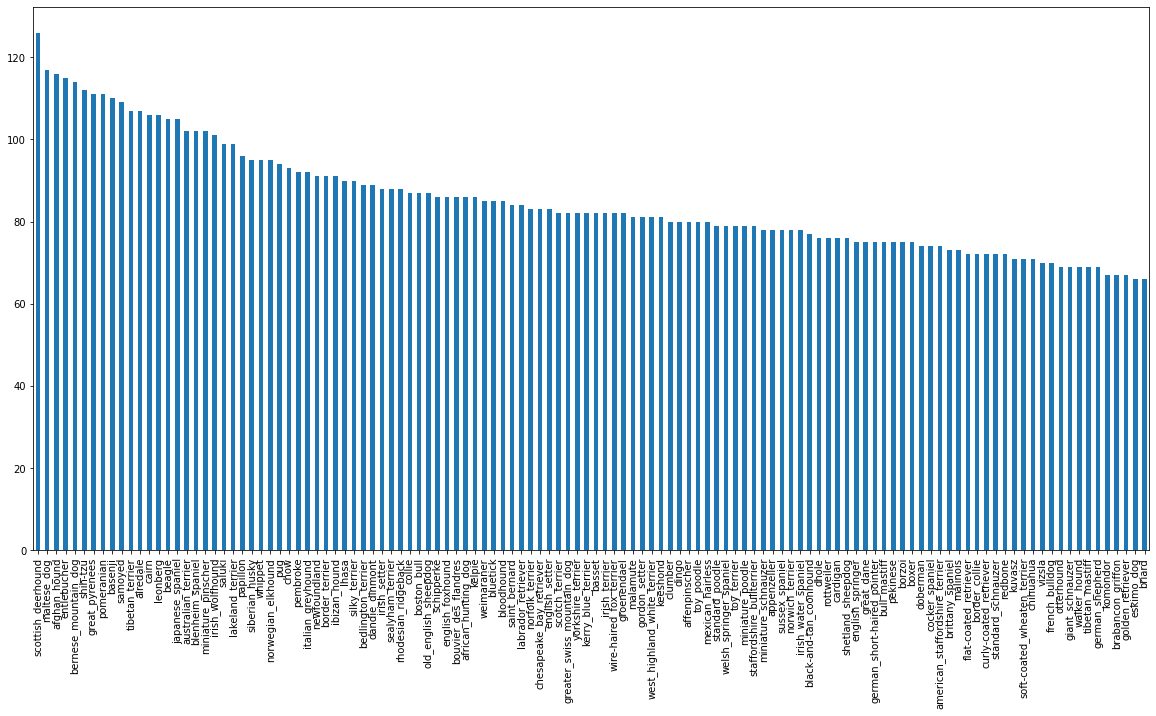

In [13]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [14]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

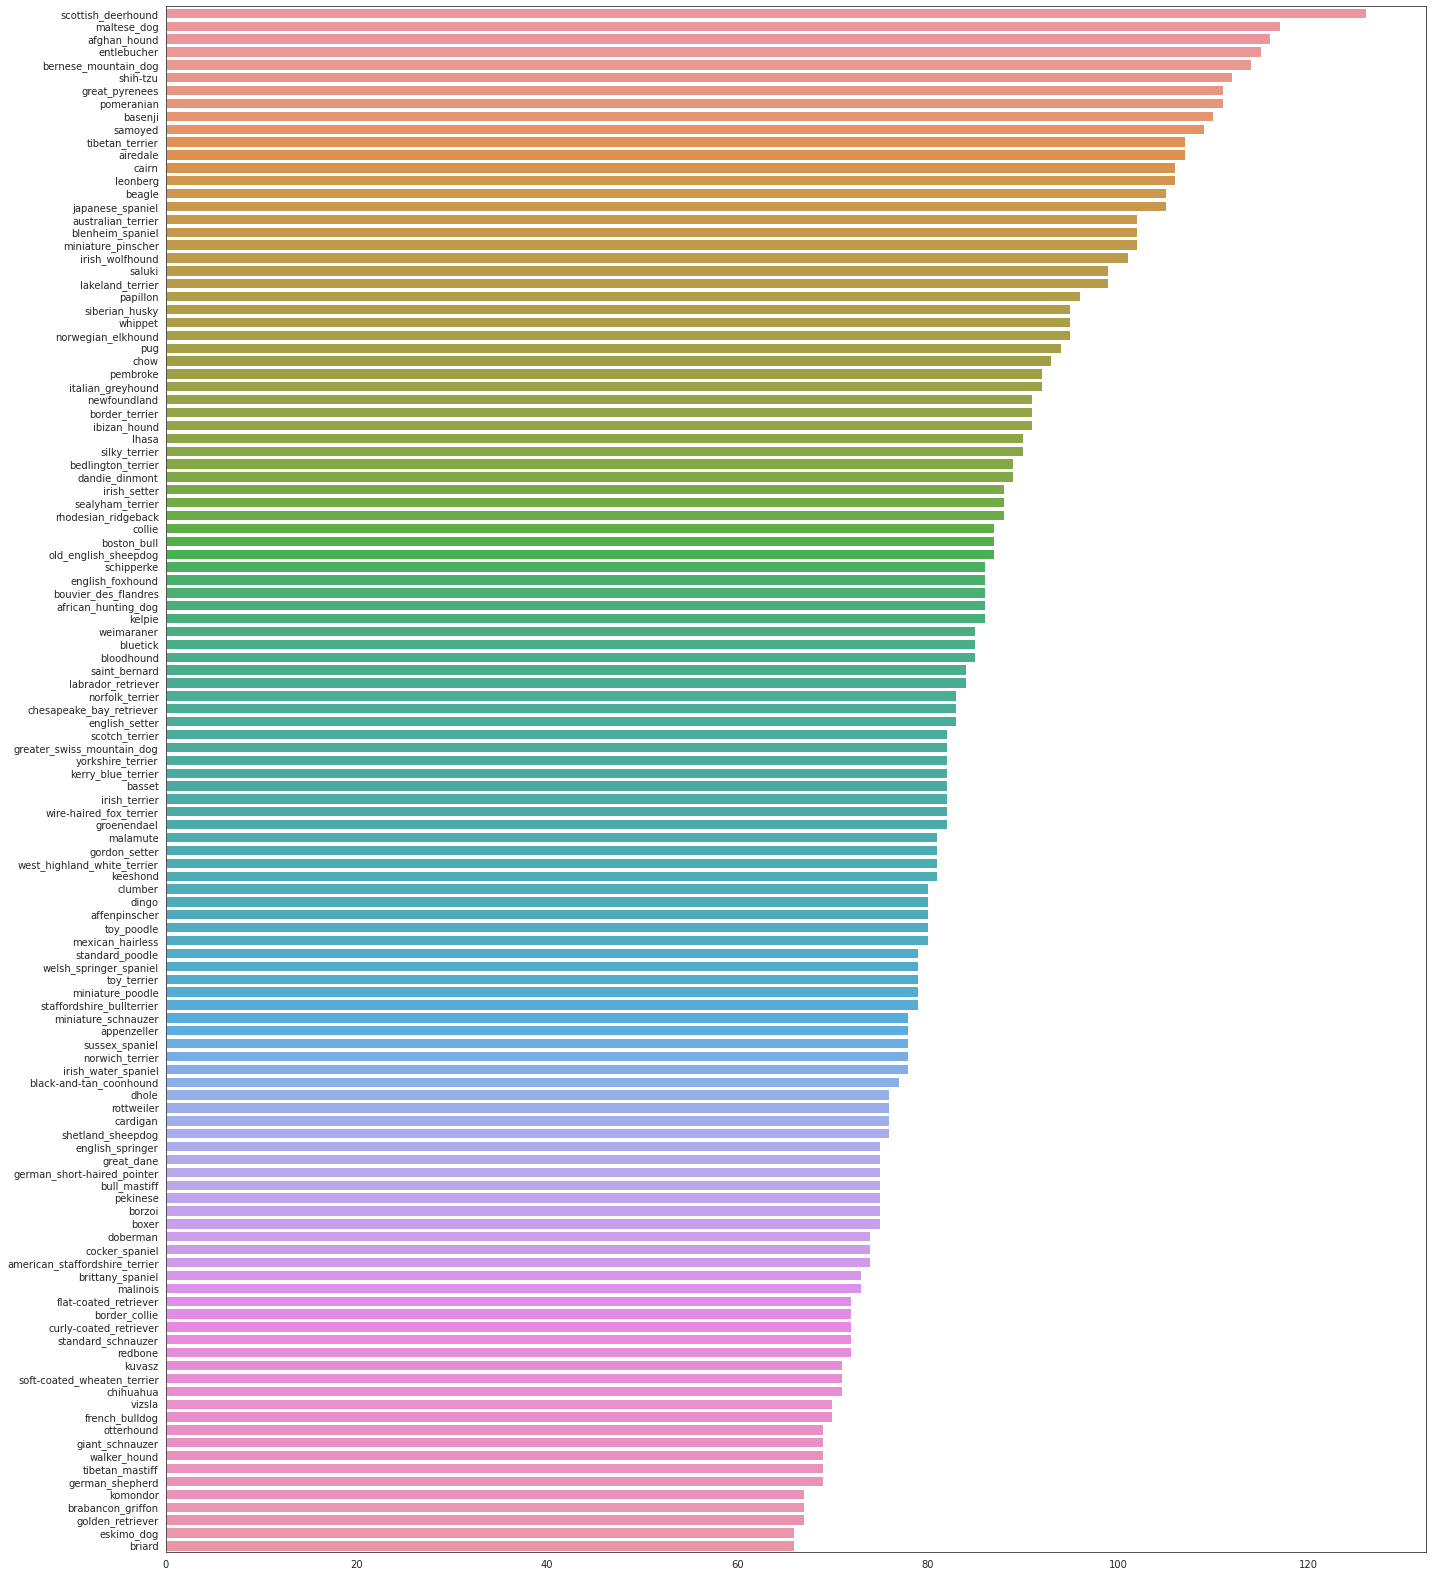

In [15]:
sns.set_style('white')
plt.figure(figsize=(20,22))
sns.barplot(y= labels_csv["breed"].value_counts().index,x = labels_csv["breed"].value_counts().values,orient='h')
plt.tight_layout()
# plt.set_xticklabels(rotation=90)
# plt.xticks(rotation='vertical');

# sns.lineplot(y = np.mean(labels_csv['breed'].value_counts().values), x=labels_csv["breed"].value_counts().index);

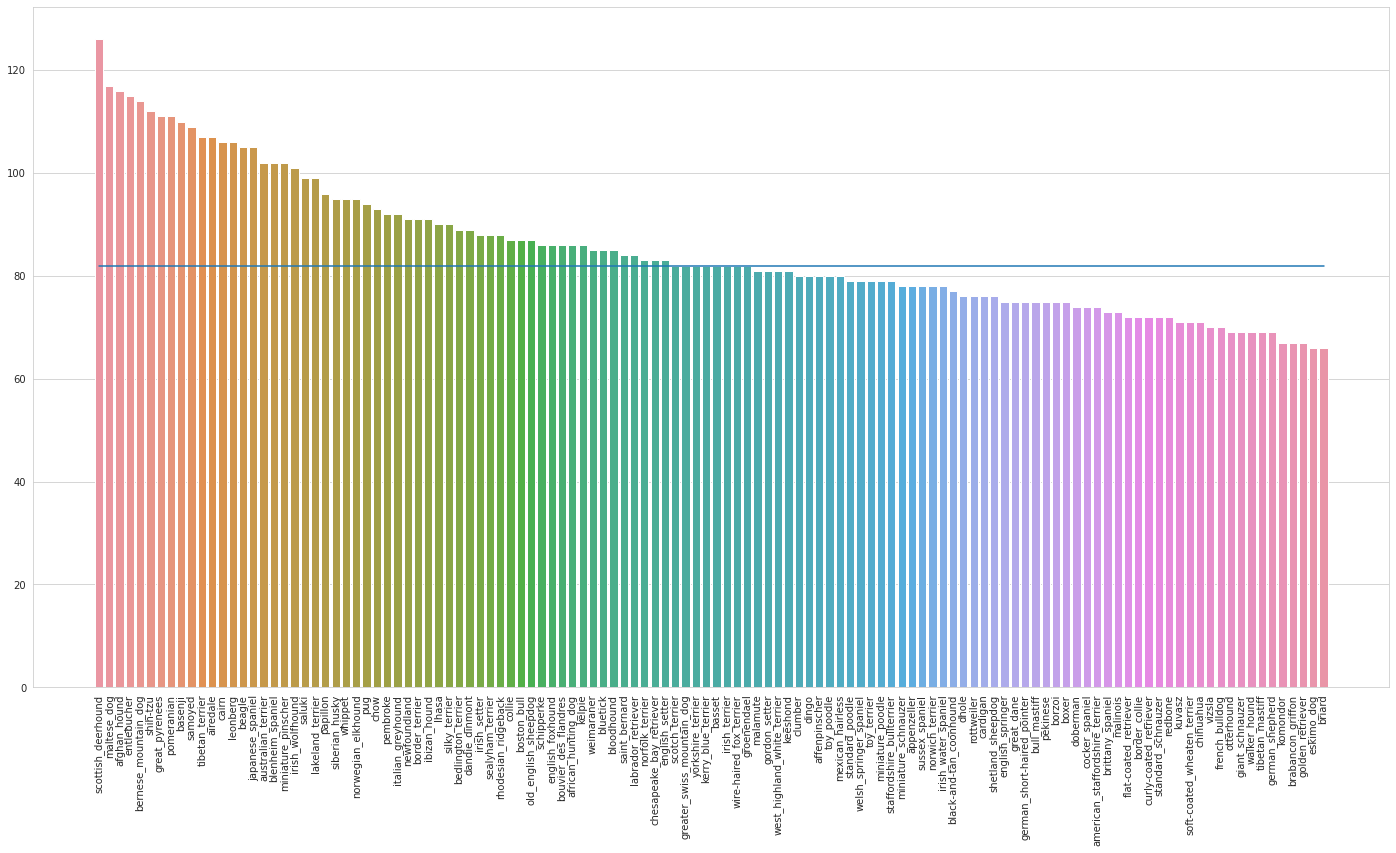

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x= labels_csv["breed"].value_counts().index,y = labels_csv["breed"].value_counts().values)
plt.tight_layout()
# plt.set_xticklabels(rotation=90)
plt.xticks(rotation='vertical');
sns.lineplot(y = np.median(labels_csv['breed'].value_counts().values), x=labels_csv["breed"].value_counts().index);

In [17]:
np.mean(labels_csv['breed'].value_counts().values),np.median(labels_csv['breed'].value_counts().values)

(85.18333333333334, 82.0)

This is a good amount as for some of their vision products [Google recommends a minimum of 10 images per class to get started](https://cloud.google.com/vision/automl/object-detection/docs/prepare). And as you might imagine, the more images per class available, the more chance a model has to figure out patterns between them.

Let's check out one of the images.


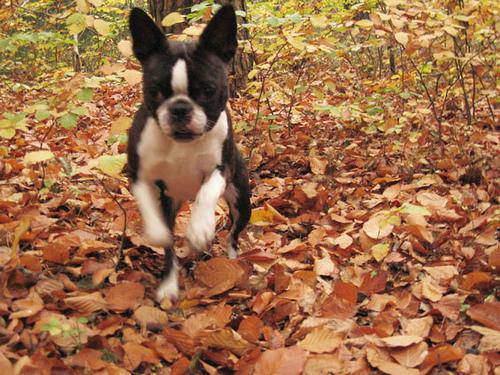

In [18]:
from IPython.display import display, Image
Image('drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

Yupp... That's a cute little dog!!  

Now that we have visualized our data and know the average distribution, let us convert into a format that can be used for training out models

### Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (`labels_csv`), we'll use it to create:
* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [19]:
filenames = ['drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:5]

['drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [20]:
filenames[5]

'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/002211c81b498ef88e1b40b9abf84e1d.jpg'

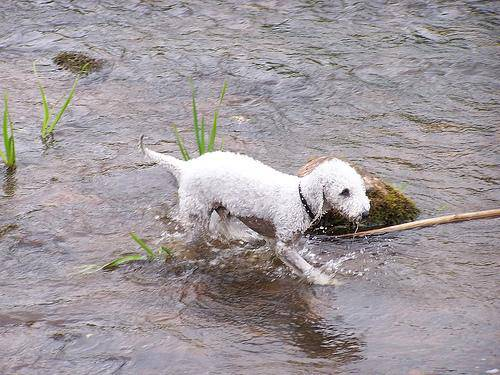

In [21]:
Image('drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/000bec180eb18c7604dcecc8fe0dba07.jpg')
Image(filenames[5])

Now we've got a list of all the filenames from the ID column of `labels_csv`, we can compare it to the number of files in our training data directory to see if they line up.

If they do, great. If not, there may have been an issue when unzipping the data (what we did above), to fix this, you might have to unzip the data again. Be careful not to let your Colab notebook disconnect whilst unzipping.

In [22]:
len(filenames)

10222

In [23]:
import os
if len(os.listdir('drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/'))==len(filenames):
  print('Number of files in google drive train folder and in our file names match.')
else:
  print('number of files donot match.')


Number of files in google drive train folder and in our file names match.


Yesss!!! So the number of files match.

In [24]:
labels = labels_csv['breed'].to_numpy()

In [25]:
labels[:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

Now let's compare the length of labels to the length of filenames to check if they are same.

In [26]:
if len(labels)==len(filenames):
  print('same length.')
else:
  print('Length not same.')

same length.


If it all worked, we should have the same amount of images and labels.

Finally, since a machine learning model can't take strings as input (what `labels` currently is), we'll have to convert our labels to numbers. 

To begin with, we'll find all of the unique dog breed names.

Then we'll go through the list of `labels` and compare them to unique breeds and create a list of booleans indicating which one is the real label (`True`) and which ones aren't (`False`).

Below I have demonstrated 2 ways to get the list of unique labels  
1) saved to unique_labels  [Using `np.array(labels_csv['breed'].value_counts().index)`]  
2) saved to unique_breeds [Using `np.unique(labels)`]

In [27]:
unique_labels = np.array(labels_csv['breed'].value_counts().index)

In [28]:
len(unique_labels)

120

In [29]:

unique_labels[:5]

array(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog'], dtype=object)

In [30]:
unique_breeds = np.unique(labels)
unique_breeds[:5]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier'], dtype=object)

In [31]:
len(unique_breeds)

120

For now let's work using `unique_breeds`

Now that we have an array of unique labels, we can use `unique_breeds` to help turn our `labels` array into an array of booleans .we can label of each image with `unique_breed` array and get a boolean array for that label that is `True` at place where label value is equal to value in `unique_breed` array else `False`. This is for making a `One Hot Array`

In [32]:
# First try converting one label to a boolean array
boolean = (labels[0]==unique_breeds)
boolean

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [33]:
# Similarily we convert our full labels array to a boolean form
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [34]:
len(boolean_labels)==len(filenames)

True

Why do it like this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as `boston_bull` into a one-hot array. 

Let's see an example.

In [35]:
# sample conversion to numeric form
print(labels[0])
print(labels[0]==unique_breeds)
print(np.where(labels[0]==unique_breeds)[0][0])
print(boolean_labels[0].argmax())
print((labels[0]==unique_breeds).astype(int))

boston_bull
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Wonderful! Now we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.

### Creating our own validation set

Since this dataset from Kaggle doesn't come with a validation set, we'll need to make one.

We could use Scikit-Learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to `X` (data) and our labels to `y`.

In [36]:
X = filenames.copy()
y = boolean_labels.copy()

In [37]:
len(X), len(y)

(10222, 10222)

In [38]:
X[:5]

['drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [39]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [40]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

use `train_test_split` to split data into train and validation set.  
We will use a 8/2 split for our training and validation data.


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2, random_state=42)

In [42]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [43]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,

In [44]:
X_val[:5],y_val[:2]

(['drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/0ca9280205bd68d201e1d708db3f209d.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/12405b2e93417d81f5308769c4e184c7.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/1242da788ce85d4311e1cc9922a0a809.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/1015e4eba660def32e7e52b89fe3a9c6.jpg',
  'drive/My Drive/Dog-Breed-Classification-Deep-Learning/train/09d5ac8026b8a7f7d1acae244765fe24.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,

## Preprocessing

### Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays, a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpeg file) into Tensors.
4. Resize the `image` to be of shape (224, 224).
5. Return the modified `image`.

A good place to read about this type of function is the [TensorFlow documentation on loading images](https://www.tensorflow.org/tutorials/load_data/images). 

We use (224,224,3), which is (height, width, channels), because this is the size of input that the model we are going to use takes.




In [45]:
image = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [46]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

Now, we can convert these images into tensor using `tf.constant`

In [47]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now, let's build a function that combines all our preprocessing steps

In [48]:
IMG_SIZE = 224
def process_image(image_path):
  """
  Takes image path as input and turns it into a tensor.

  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image
  

### Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow [`BatchDataset`](https://www.tensorflow.org/guide/data#batching_dataset_elements)).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.



TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time.

In [49]:
def tuple_image_label (image_path, label):
  """
  Processes image at image_path and returns processed image and label as a tuple.
  """
  # Process image
  image = process_image(image_path)
  return (image, label)


Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Since we need to create 3 different sets: Train, valid, test and there is a difference in how training, validation and testing data needs to be processed to convert data to batches. So, this function will have 3 sections in order to address requirements of each set.

We'll set a default batch size of 32 because [according to Yann Lecun](https://twitter.com/ylecun/status/989610208497360896?s=20) (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [50]:
BATCH_SIZE=32
def form_data_batches(X, y=None,batch_size=BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """

  # If it is a test set we won't have y labels
  if test_data:
    print("Creating testing set...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only file names
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # Validation set doesnot require shuffling
  elif valid_data:
    print("Creating Validation set...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # tuple of filenames and labels
    data_batch = data.map(tuple_image_label).batch(BATCH_SIZE)
    return data_batch

  #test data needs to be shuffled
  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(tuple_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [51]:
train_data = form_data_batches(X_train, y_train)
val_data = form_data_batches(X_val,y_val, valid_data=True)

Creating training data batches...
Creating Validation set...


In [52]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [53]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

Finally... We've got our data in batches, more specifically, they're in Tensor pairs of (images, labels) ready for use on a GPU.


### Visualizing data batches

Now that we have data in form of tensor BatchDataset, let's visualize the batches and see how to access them. This will also help us understand what is going on behind the scenes.

In [54]:
def show_25_images(images, labels):
  """
  Takes a batch of data as input and plots the first 25 images in the batch along with labels
  """
  # imitialize a matplotlib figure
  plt.figure(figsize=(10,10))
  # run a loop to plot 25 images
  for i in range(25):
    # divide plot into 25 (5 X 5) subplots and select (i+1)th subplot
    plt.subplot(5,5,i+1)
    # plot the current image on the (i+1)th subplot
    plt.imshow(images[i])
    # Set the image title as the breed it belongs to
    plt.title(unique_breeds[labels[i].argmax()])
    # turn axis off to prevnt crowding
    plt.axis('off')
    # Decongest the plot
plt.tight_layout()

<Figure size 432x288 with 0 Axes>


To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we need to unwind it.

We can do so by calling the [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator) method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to [`next()`](https://docs.python.org/3/library/functions.html#next) will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**Note:** Running the cell below and loading images may take a little while.

In [55]:
train_batch_images, train_batch_labels = next(train_data.as_numpy_iterator())

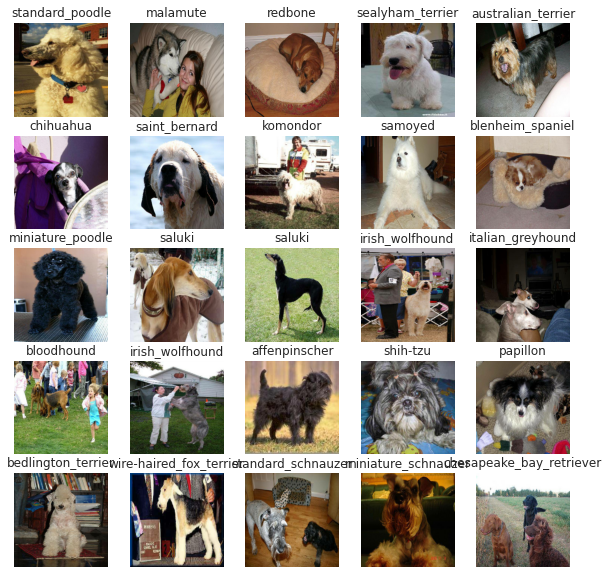

In [56]:
show_25_images(train_batch_images, train_batch_labels)

In [57]:
val_batch_images, val_batch_labels = next(val_data.as_numpy_iterator())

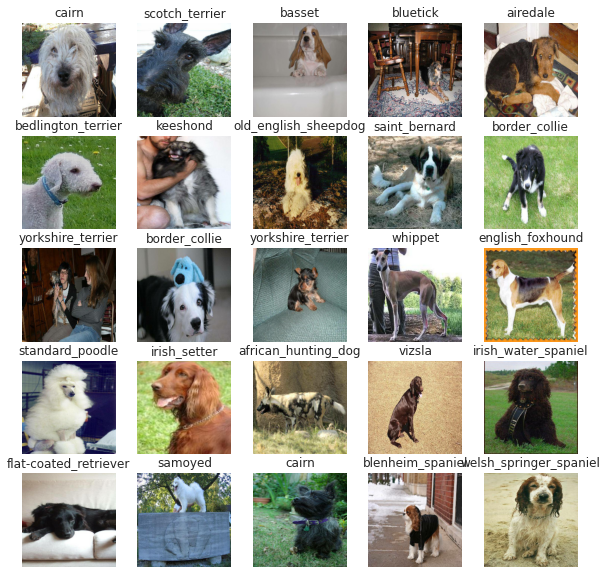

In [58]:
show_25_images(val_batch_images, val_batch_labels)

While running the above cells and observing the images we notice that the training images are different each time but the validation images are always the same.  
This is because we shuffled the training data and not the validation data.

# Creating and training a model

In this Project we will be using transfer learning for making our classifications.  

Using a pretrained machine learning model is often referred to as **transfer learning**.  

We'll use an existing model from [TensorFlow Hub](https://tfhub.dev/).  

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.  



#### Why use a pretrained model?

Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

#### How do we choose a model?

Since we know our problem is image classification (classifying different dog breeds), we can navigate the [TensorFlow Hub page by our problem domain (image)](https://tfhub.dev/s?module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent). 

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, [image classification](https://tfhub.dev/s?module-type=image-classification).

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the [mobilenet_v2_130_224](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4) model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

### Building a model

Before we build a model, there are a few things we need to define:
* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.


In [59]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to [use the Keras API](https://www.tensorflow.org/guide/keras/overview).


Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.


In [60]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

What's happening here?

#### Setting up the model layers

There are two ways to do this in Keras, the [functional](https://www.tensorflow.org/guide/keras/functional) and [sequential API](https://www.tensorflow.org/guide/keras/overview#build_a_simple_model). We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (`hub.KerasLayer(MODEL_URL)`. So our first layer is actually an entire model (many more layers). This **input layer** takes in our images and finds patterns in them based on the patterns [`mobilenet_v2_130_224`](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4) has found.

The next layer (`tf.keras.layers.Dense()`) is the **output layer** of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The `activation="softmax"` parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels [somewhere between 0 & 1](https://en.wikipedia.org/wiki/Softmax_function). The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use `activation="sigmoid"`.

For more on which activation function to use, see the article [Which Loss and Activation Functions Should I Use](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)?

#### Compiling the model

This one is best explained with a story.

Let's say you're at the international hill descending championships. Where your start standing on top of a hill and your goal is to get to the bottom of the hill. The catch is you're blindfolded.

Luckily, your friend Adam is standing at the bottom of the hill shouting instructions on how to get down.

At the bottom of the hill there's a judge evaluating how you're doing. They know where you need to end up so they compare how you're doing to where you're supposed to be. Their comparison is how you get scored.

Transferring this to `model.compile()` terminology:
* `loss` - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
* `optimizer` - Your friend Adam is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the [Adam optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) is a great general which performs well on most models. Other optimizers include [RMSprop](https://ruder.io/optimizing-gradient-descent/index.html#rmsprop) and [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).
* `metrics` - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.

#### Building the model

We use `model.build()` whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is `[None, IMG_SIZE, IMG_SIZE, 3]` or `[None, 224, 224, 3]` or `[batch_size, img_height, img_width, color_channels]`.

Batch size is left as `None` as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call `summary()` on our model to get idea of what our model looks like.

In [61]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


The non-trainable parameters are the patterns learned by `mobilenet_v2_130_224` and the trainable parameters are the ones in the dense layer we added.

This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.

### Creating callbacks

We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

Callbacks help us to trace the training process and also give us regular updates on how well the training is processing.
Here we are defining two callbacks:
* Tensorboard Callback
* Early Stopping Callback


#### TensorBoard Callback

[TensorBoard](https://www.tensorflow.org/tensorboard/get_started) helps provide a visual way to monitor the progress of your model during and after training.

It can be used [directly in a notebook](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks) to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize the our models training logs using the `%tensorboard` magic function (we'll do this later on).

In [62]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [63]:
# Function to create a tensorboard callback
import datetime
def create_tensorboard_callback():
  logDir = os.path.join("drive/My Drive/Dog-Breed-Classification-Deep-Learning/logs/",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S")   # Path to save tensorboard logs each time we fit the model
                      )
  return tf.keras.callbacks.TensorBoard(logDir)

Now let us make an earlystopping callback.  
EarlyStopping callback is used to stop the training earlier. This prevents the model from overfitting.  
EarlyStopping stops training in case the specified metrics doen't improve for some epochs.

In [64]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

### Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is `NUM_EPOCHS` (also known as **number of epochs**).

`NUM_EPOCHS` defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If `NUM_EPOCHS=1`, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for `NUM_EPOCHS`?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set `NUM_EPOCHS` to 100 but our model stops improving after 22 epochs, it'll stop training.

In [65]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type : 'slider', min:10, max:200,step:10} 

In [66]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  Runs 3 functions implicitly [create_model, create_tensorboard_callback(), model.fit()]
  
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

Finally....  
Now we are done with all the steps required before we can train our model and begin classification.  
**Note:** When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised. Using more data will generally take longer, which is why we've started with ~1000 images. After the first epoch, subsequent epochs should take a few seconds.  
Let's train it...

In [67]:
# Fit the model
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 433s 17s/step - loss: 4.5310 - accuracy: 0.1100 - val_loss: 3.4984 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 5s 180ms/step - loss: 1.6305 - accuracy: 0.6888 - val_loss: 2.2319 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 179ms/step - loss: 0.5636 - accuracy: 0.9312 - val_loss: 1.7344 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2514 - accuracy: 0.9875 - val_loss: 1.5298 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 4s 179ms/step - loss: 0.1473 - accuracy: 0.9987 - val_loss: 1.4582 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 180ms/step - loss: 0.1000 - accuracy: 1.0000 - val_loss: 1.4171 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================

It looks like our model might be overfitting (getting far better results on the training set than the validation set)

**Note:** Overfitting to begin with is a good thing. It means our model is learning something.

#### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and viualize its contents.

In [68]:
%tensorboard --logdir /content/drive/My\ Drive/Dog-Breed-Classification-Deep-Learning/logs

<IPython.core.display.Javascript object>

In [69]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [70]:
pred_prob = model.predict(val_data, verbose = 1)

7/7 [==============================] - 1s 117ms/step


In [71]:
pred_prob[0]

array([1.75024325e-03, 2.87892035e-04, 2.22779973e-03, 7.33948982e-05,
       3.74013151e-04, 4.92045656e-05, 3.25635672e-02, 5.86764247e-04,
       5.12263177e-05, 2.97561899e-04, 1.46905542e-04, 8.15227904e-05,
       1.35531795e-04, 1.66113576e-04, 4.34807676e-04, 5.97318355e-03,
       1.70798943e-04, 2.14581177e-01, 2.94066758e-05, 1.80189854e-05,
       3.76793300e-03, 9.22978143e-05, 1.05069139e-05, 1.29908859e-03,
       3.38293867e-05, 3.09024967e-04, 1.32062778e-01, 1.85409066e-04,
       2.61534646e-04, 1.14672037e-03, 2.08292709e-04, 4.08779224e-03,
       9.20295133e-04, 3.24606335e-05, 5.63274894e-04, 4.87043411e-02,
       2.56570293e-05, 2.63808819e-04, 1.41281853e-04, 9.19065496e-05,
       9.05346416e-04, 2.78615480e-05, 4.45078767e-04, 6.37347053e-04,
       1.01332735e-05, 6.89265376e-04, 2.39388282e-05, 1.78102477e-04,
       3.60985287e-04, 2.74622609e-04, 1.74378201e-05, 8.43211456e-05,
       1.64691010e-04, 2.05497327e-05, 6.61020676e-05, 9.46578220e-05,
      

In [72]:
pred_prob.shape

(200, 120)

In [73]:
def prob_to_label(prediction_probability, unique_labels = unique_breeds):
  """
  takes the prediction probabilities and returns the predicted labels
  """
  return unique_labels[np.argmax(prediction_probability)]

In [74]:
np.argmax(pred_prob[0])

17

In [75]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [76]:
unique_breeds[np.argmax(pred_prob[0])]

'border_terrier'

In [77]:
pred_labels = prob_to_label(pred_prob[0])
pred_labels

'border_terrier'

Our val_data is still in batch form so we will unbatchify it and then make a funtion to compare the predictions made with the actual labels 

In [78]:
def unbatchify(val_data):
  """
  Convert tensorflow databatches to iterable format
  """
  images=[]
  labels=[]
  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

In [79]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [80]:
val_images[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:
* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

Now that we have predictions in form of the labels rather than just some weird numbers(probabolities).
We will now visualize the predictions along with some images and check what the model predicted vs what it should have predicted. (Predicted labels vs true labels)

The plot_pred function is written in 2 different ways below

In [81]:
def plot_pred_1(image, label, pred_prob):
  """
  View the predicted label, truth label and the image for a specified image
  """
  pred_label = prob_to_label(pred_prob)
  true_label = label
  if(pred_label == true_label):
    color = "green"
  else:
    color = "red"
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
  sns.set_style('white')
  plt.title("{} - {:2.0f}% - ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)
  # plt.show()

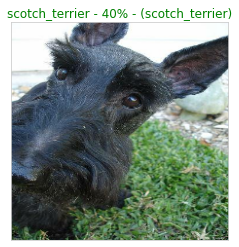

In [82]:
plot_pred_1(val_images[1],val_labels[1],pred_prob[1])

In [83]:
def plot_pred_2(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label =prob_to_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

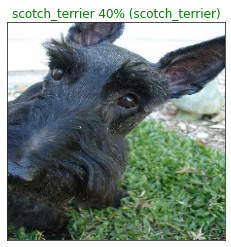

In [84]:
# View an example prediction, original image and truth label
plot_pred_2(prediction_probabilities=pred_prob,
          labels=val_labels,
          images=val_images)

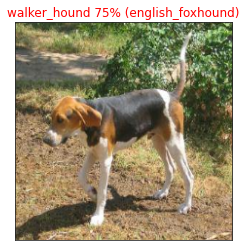

In [85]:
# View an example prediction, original image and truth label
plot_pred_2(prediction_probabilities=pred_prob,
          labels=val_labels,
          images=val_images,
          n=42)

Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using `get_pred_label()`.
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
  * Arrange top 10 in descending order of probability
* Plot the top 10 prediction probability values and labels, coloring the true label green.

First, we need to get indices that correspond to the top 10 probability values, For this we can use `argsort` function.  
   
`argsort` returns an array of actual indices of the sorted array in ascending order.   
But we need the top 10 so we need to invert this and take the top 10. Below I have mentioned two ways to do this.    
  


> 1.   `sorted_indices` = pred_prob [ n ].argsort()  
      top_10 = `sorted_indices[-10:][::-1]`
2.    top_10 = `(-pred_prob[n]).argsort()[:10]`




In [86]:
def plot_top_predictions (prediction_probabilities, labels, n):
  """
  Plots the top 10 predictions for an image
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  # To get what our model predicted 
  pred_label = prob_to_label(pred_prob)
  # First we need to get indices (10) with highest values of probabilities
  # top_10_pred_indices = pred_prob[1].argsort()[-10:][::-1] # this can also be used
  top_10_pred_indices = (-pred_prob).argsort()[:10]

  # Now we need the labels (breed names) corresponding to these values/indices
  top_10_pred_labels = unique_breeds[top_10_pred_indices]

  # Now to get the corresponding probability values
  top_10_pred_prob = pred_prob[top_10_pred_indices]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_prob, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Now we need to colour the correct prediction in green
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


In [87]:
sorted_indices = pred_prob[1].argsort()
sorted_indices

array([ 65,  33,  94,  61,  53,  85,  83, 108,  30,  14,  12,  66,  49,
        39,  78,  56, 119,  18,  22,  69,  90, 100,  52,  88,  79, 113,
        92,  62,  21,  99,  63,  35,  13,  24, 110,  19,  93,  15, 107,
        91,  41, 109,   5,  47,  51,  28,  50,  36, 114,  60,   1,  23,
        11,   7,  34, 112,  82, 101,  38,  67,  42,  70, 102,  29,  31,
        87, 103, 111,  17,  40,  46,  84,  76,  75,  73,  25,  44, 105,
       117,  98,  43,  86,   3,  58,  95,  89,  81,  45,  20, 104,  32,
         9,  37,   4,   8,   2,  80,  64,   0, 118, 115,  55,  10,  54,
        72,  71,  68,  27,  16,  97,  59,  74, 116, 106,   6,  57,  48,
        26,  77,  96])

In [88]:
unique_breeds[sorted_indices[-1]]

'scotch_terrier'

In [89]:
unique_breeds[np.argmax(pred_prob[1])]

'scotch_terrier'

In [90]:
np.argmax(pred_prob[1]) # We get the index same as the last one in our sorted indexes

96

In [91]:
# To get the top 10 we need to take last 10 indices from `sorted_indices` array
sorted_indices[-10:]

array([ 59,  74, 116, 106,   6,  57,  48,  26,  77,  96])

In [92]:
# Now that we have got last 10 indices we need to reverse it so that we have a list in descending order of probability
sorted_indices[-10:][::-1]

array([ 96,  77,  26,  48,  57,   6, 106, 116,  74,  59])

In [93]:
# another way to get similar results as above (10 highest values)

(-pred_prob[1]).argsort()[:10]


array([ 96,  77,  26,  48,  57,   6, 106, 116,  74,  59])

In [94]:
# Now we need to get label names for these indices
top = unique_breeds[(-pred_prob[1]).argsort()[:10]]
top

array(['scotch_terrier', 'miniature_schnauzer', 'cairn',
       'giant_schnauzer', 'irish_terrier', 'australian_terrier',
       'standard_schnauzer', 'west_highland_white_terrier',
       'mexican_hairless', 'irish_wolfhound'], dtype=object)

In [95]:
# to get the probability values corresponding to the indices
pred_prob[1][(-pred_prob[1]).argsort()[:10]]

array([0.39826965, 0.19617021, 0.15851639, 0.05622118, 0.02630094,
       0.02078371, 0.01890521, 0.01824124, 0.01022599, 0.00798624],
      dtype=float32)

In [96]:
pred_prob[1][np.argmax(pred_prob[1])]

0.39826965

In [98]:
# a[10:] = ['grey']

NameError: ignored

In [103]:
np.where(top == val_labels[1])[0][0]

0

In [104]:
top == labels[1]

array([False, False, False, False, False, False, False, False, False,
       False])

In [105]:
a = ['green' if (labels[1] in top) else 'grey']

In [106]:
a

['grey']

In [109]:
# if (labels[1] == top):
#   print('grey')
# else:
#   print('green')

In [110]:
# a=np.array(10)
# j=0
# for i in top:
#   a[j] = ['green' if (np.argmax(labels[1]==i)) else 'grey']
#   print(i)
#   j+=1

In [111]:
# np.where()

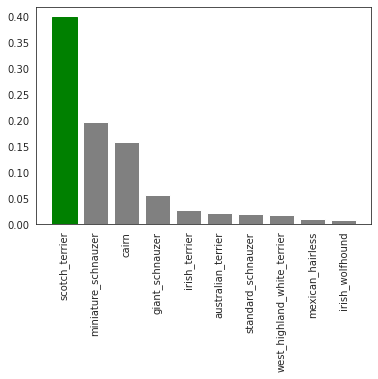

In [112]:
# Trying the function that we made above

plot_top_predictions(pred_prob, val_labels, n=1)

In [113]:
val_labels[1]

'scotch_terrier'

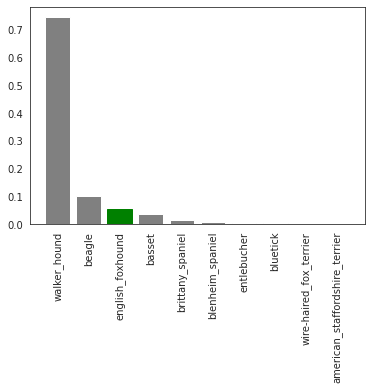

In [114]:
plot_top_predictions(pred_prob, val_labels, n=42)

Now that we have a Function that shows images along with prediction made `plot_pred_2` and a function that shows top 10 probabilities as a bar graph `plot_top_predictions`.
Let's now make a function that combines thes two functionalities and shows multiple images along with their predictions and bar plots of top predictions.

In [115]:
 def visualize_pred(images, labels, pred_prob, start=0, n_rows=3, n_cols=2):
   """
   Plots images along with true labels, predicted labels, top prediction probabilities bar graph
   """
   num_images = n_rows * n_cols 
   plt.figure(figsize = (5*2*n_cols, 5*n_rows))
   for i in range(num_images):
     # Plot the images along with predicted and true label
     plt.subplot(n_rows, 2 * n_cols, 2*i+1)
     plot_pred_2(pred_prob, labels, images, n=start+i)

     # Plot the top 10 predictions bar graph
     plt.subplot(n_rows, 2 * n_cols, 2*i+2)
     plot_top_predictions(pred_prob, labels, n= start+i)
   plt.tight_layout()
   plt.show()

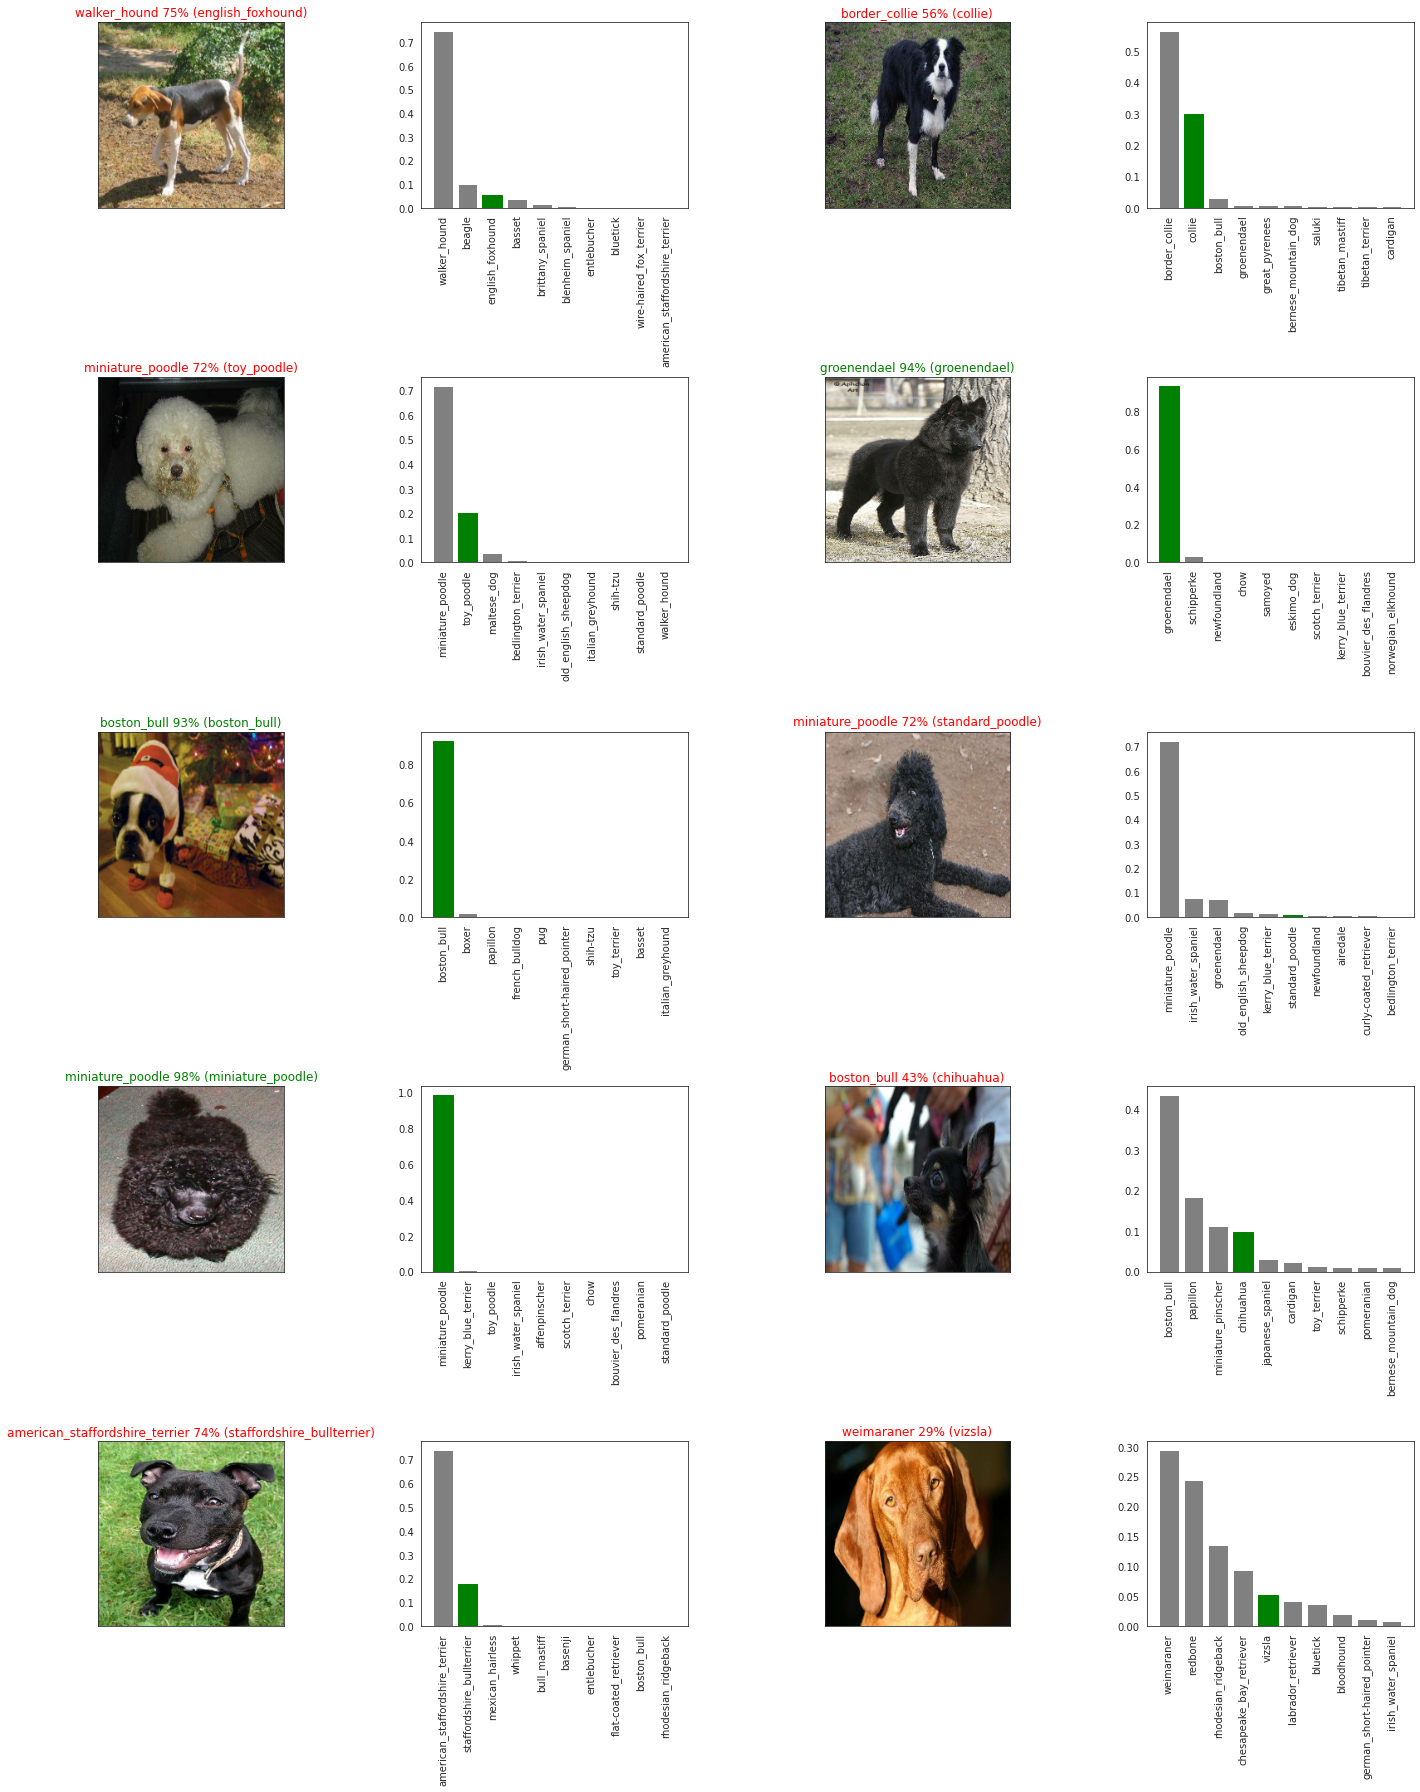

In [117]:
visualize_pred(val_images, val_labels, pred_prob, start= 42, n_rows = 5, n_cols = 2)

## Saving and reloading a model

After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an [entire saved Keras model is h5](https://www.tensorflow.org/tutorials/keras/save_and_load). So we'll make a function which can take a model as input and utilise the [`save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) method to save it as a h5 file to a specified directory.

In [134]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  model_dir = os.path.join("/content/drive/My Drive/Dog-Breed-Classification-Deep-Learning/saved_models/", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"Saving model to {model_path}...")
  model.save(model_path)
  return model_path


If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) function to load it into the notebook.

Because we're using a component from TensorFlow Hub (`hub.KerasLayer`) we'll have to pass this as a parameter to the `custom_objects` parameter.

In [131]:
def load_model(model_path):
  """
  Loads a saved model from given path
  """
  model = tf.keras.models.load_model(model_path, custom_objects = {"KerasLayer": hub.KerasLayer})
  return model


In [132]:
# Save model trained on 1000 images
save_model(model, suffix="1000_images-Adam")

Saving model to: drive/My Drive/Dog-Breed-Classification-Deep-Learning/saved_models/20200716-22451594939511-1000_images-Adam.h5...


'drive/My Drive/Dog-Breed-Classification-Deep-Learning/saved_models/20200716-22451594939511-1000_images-Adam.h5'

In [135]:
loaded_1000_images_model = load_model("drive/My Drive/Dog-Breed-Classification-Deep-Learning/saved_models/20200716-22451594939511-1000_images-Adam.h5")

In [137]:
# Let's now check if our origin model give same results or not on the val_data
model.evaluate(val_data), loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 1s 114ms/step - loss: 1.2652 - accuracy: 0.6750


([1.2652205228805542, 0.675000011920929],
 [1.2652205228805542, 0.675000011920929])